In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# King County House sales prediction

This data science project is about predicting house prices based on various features of properties in a given dataset. The goal is to estimate a continuous variable — house prices — using several predictors such as the number of bedrooms, square footage, and location. To evaluate the performance of the regression models, R-squared and Mean Squared Error (MSE) were chosen as key metrics. R-squared measures the proportion of variance in house prices that is explained by our model, providing insight into its explanatory power. Meanwhile, MSE quantifies the average squared difference between predicted and actual values and helps to assess the accuracy of the predictions. Together, these metrics offer a comprehensive view of how well our model performs in predicting house prices.

A model trained on this data that is seen as a good fit could be used to make predictions about a home's value.

The dataset originates from Kaggle and contains house sale prices for King County, which includes Seattle. The King County housing data was collected from May 2014 to May 2015.

# Description of the dataset

| Column number| Column name | Type | Description |
|:----------|:----------|:----------|:----------|
|0   | id   | Categorical   | Unique ID for each home sold   |
|1   | date   | Numerical   | Date of the home sale   |
|2   | price   | Numerical   | Price of each home sold   |
|3   | bedrooms   | Categorical   | Number of bedrooms   |
|4   | bathrooms   | Categorical   | Number of bathrooms, where .5 accounts for a room with a toilet but no shower   |
|5   | sqft_living   | Numerical   | Square footage of the apartments interior living space   |
|6   | sqft_lot   | Numerical   | Square footage of the land space   |
|7   | floors   | Numerical   | Number of floors   |
|8   | waterfront   | Categorical   | A dummy variable for whether the apartment was overlooking the waterfront or not   |
|9   | view   | Categorical   | An index from 0 to 4 of how good the view of the property was   |
|10   | condition   | Categorical   | An index from 1 to 5 on the condition of the apartment   |
|11   | grade   | Categorical   | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.   |
|12   | sqft_above   | Numerical   | The square footage of the interior housing space that is above ground level   |
|13   | sqft_basement   | Numerical   | The square footage of the interior housing space that is below ground level   |
|14   | yr_built   | Numerical   | The year the house was initially built   |
|15   | yr_renovated   | Numerical   | The year of the house’s last renovation. '0' if never renovated   |
|16   | zipcode   | Categorical   | 5 digit zip code   |
|17   | lat   | Numerical   | Lattitude   |
|18   | long   | Numerical   | Longitude   |
|19   | sqft_living15   | Numerical   | The square footage of interior housing living space for the nearest 15 neighbors   |
|20   | sqft_lot15   | Numerical   | The square footage of the land lots of the nearest 15 neighbors   |

# Read in data and relevant imports

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# read data
df = pd.read_csv("../input/housesalesprediction/kc_house_data.csv", parse_dates=['date'])

# Data Exploration

In [4]:
df.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
# check shape, Non-Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

There are no missing values in the data. Except for datetime, all variables are numerical. Additionally, variables like 'waterfront', 'view' or 'condition' are categorical. However, for further analysis and modeling, the data types do not need to be changed.

In [6]:
# check statistical summary
round(df.describe())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,...,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,2014-10-29 04:38:01.959931648,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,...,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
min,1.000102e+06,2014-05-02 00:00:00,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,...,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,2014-07-22 00:00:00,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,...,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,2014-10-16 00:00:00,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,...,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,2015-02-17 00:00:00,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,...,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,2015-05-27 00:00:00,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,...,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0
std,2.876566e+09,NaN,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,...,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0


Several houses are recorded with zero bathrooms or bedrooms, which is likely an error or missing value. These zero entries will be replaced with the average number of bathrooms or bedrooms to maintain data consistency.

The Data Correction approach is implemented as part of the Data Cleaning process.

In [7]:
# check houses are recorded with zero bathrooms
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [8]:
# check houses are recorded with zero bedrooms
df[df['bedrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


One house is recorded with 33 bedrooms which is likely an error. These extreme value will be corrected and imputed based on the average number of bedrooms in this feature.

The Data Correction approach is implemented as part of the Data Cleaning process.

In [9]:
df[df['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [10]:
# There are no houses which sum of above and basement isn't equal to the total space
df[df['sqft_above']+df['sqft_basement'] != df['sqft_living']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Plot histograms of numerical columns to display the distribution of a single numerical variable. This helps in understanding the shape of the data distribution (e.g., normal, skewed). Also plot Boxplots which provide a summary of a numerical variable, showing the median, quartiles, and possible outliers.

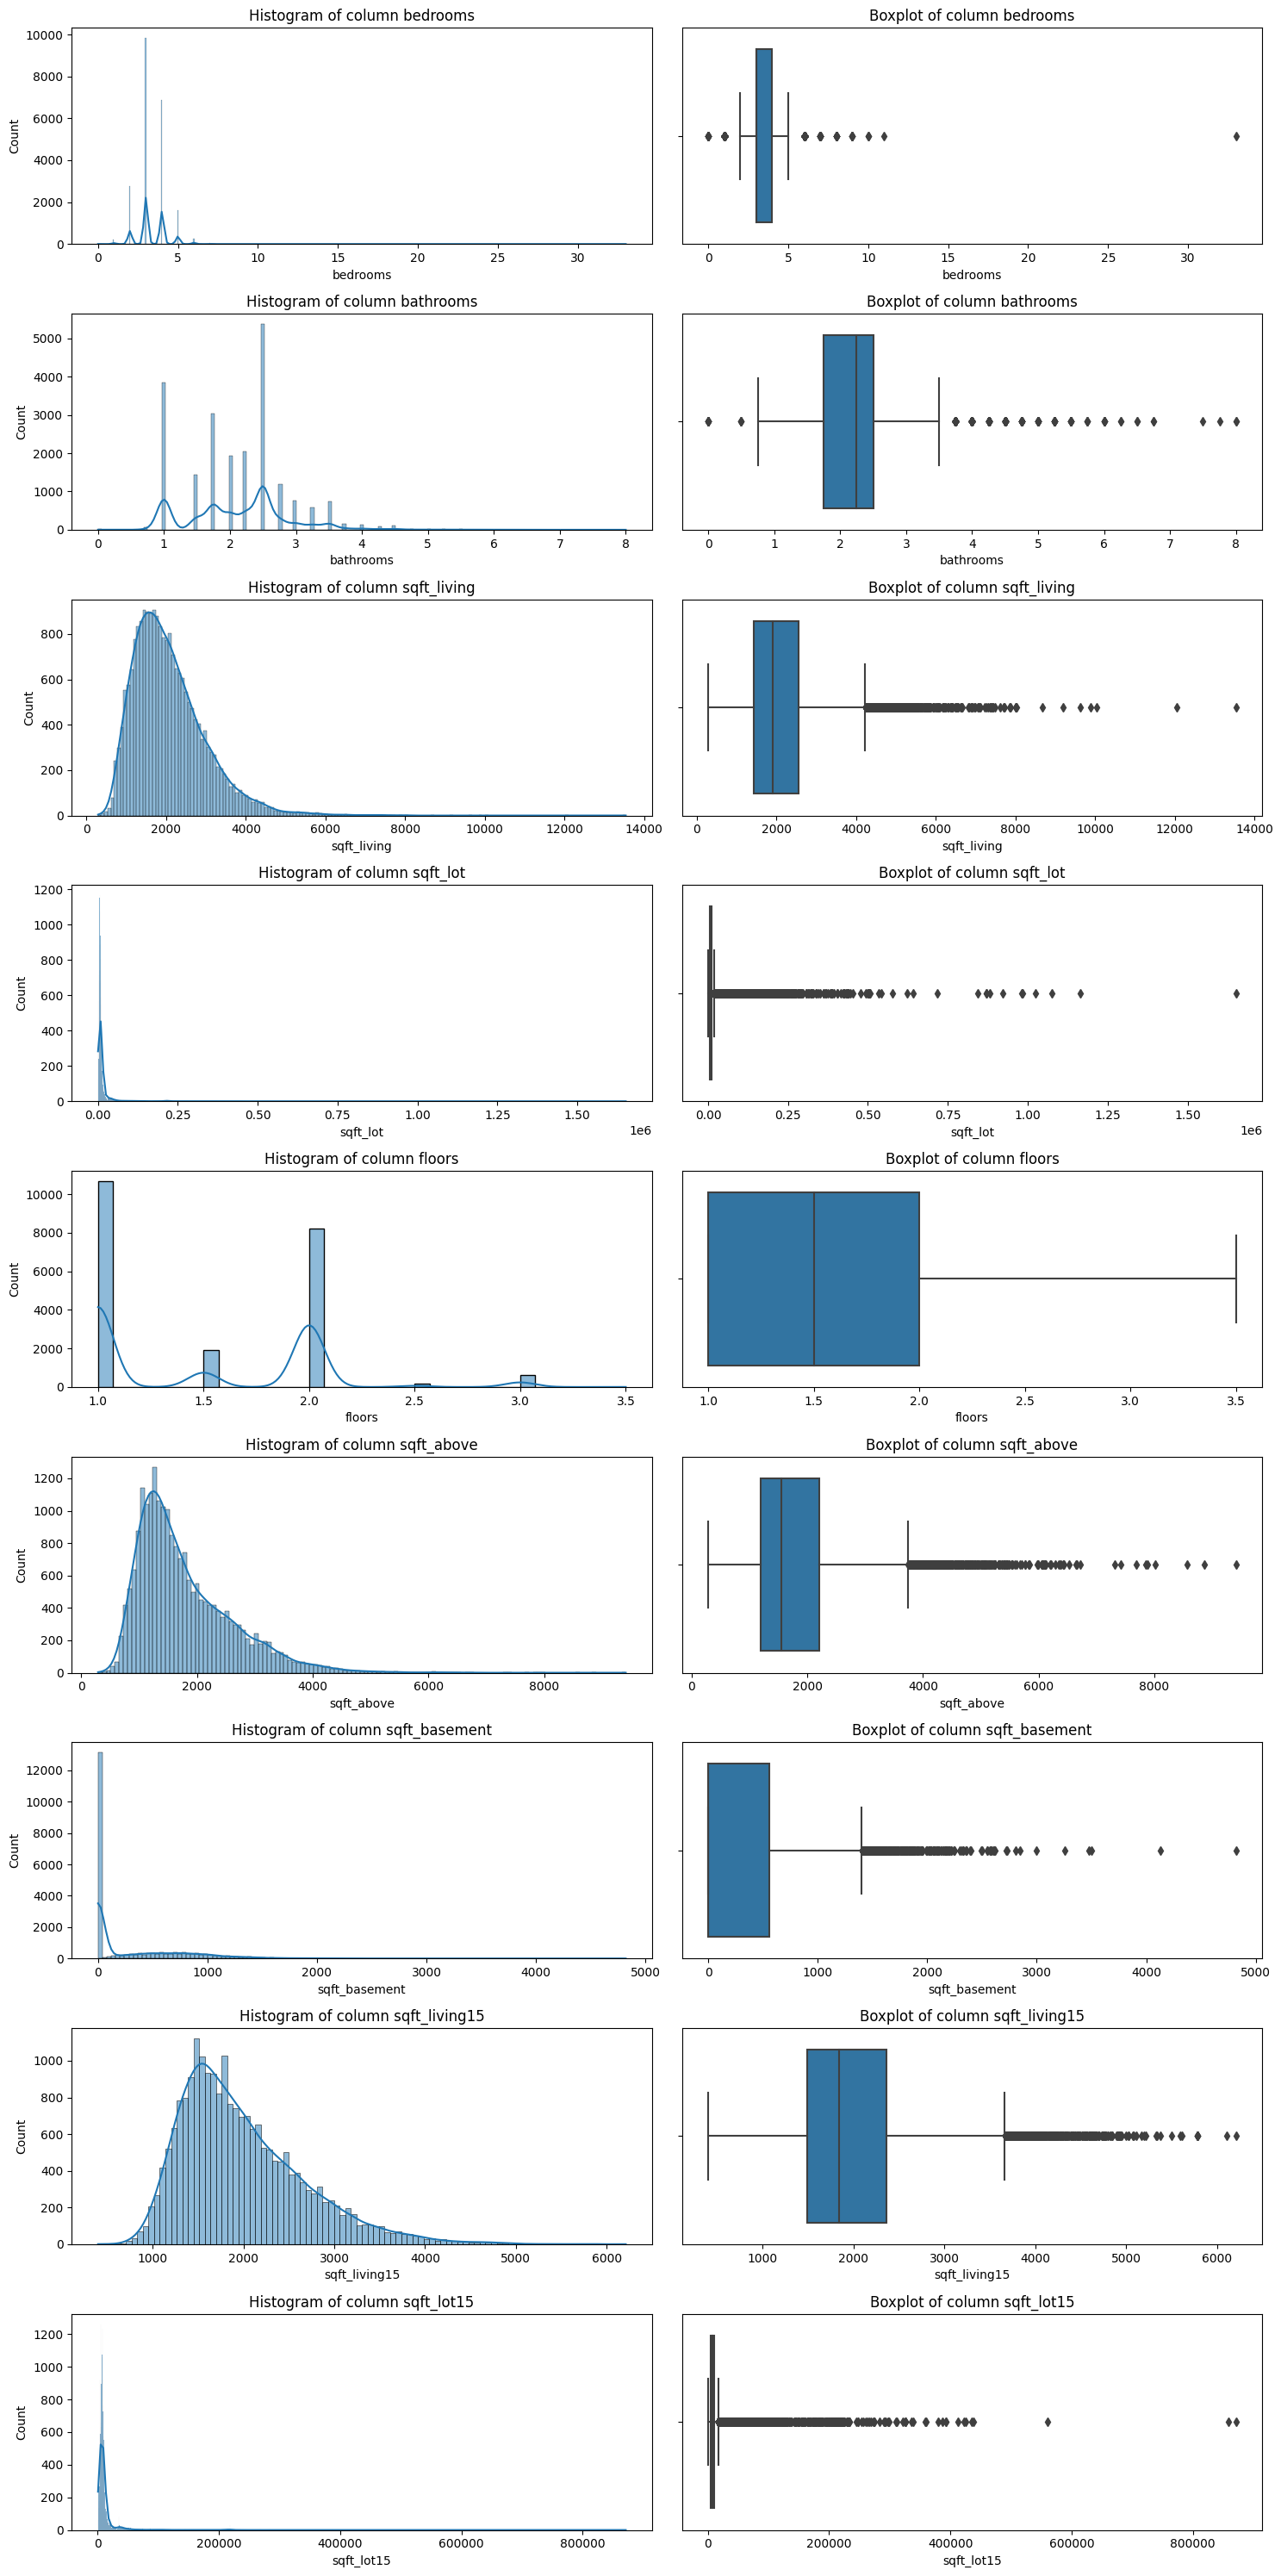

In [11]:
# Define numerical columns to plot
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
           'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Create subplots
fig, ax = plt.subplots(nrows=len(columns), ncols=2, figsize=[15, 30])

# Plotting histograms and boxplots for each column
for i, col in enumerate(columns):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax[i][0])
    ax[i][0].set_title('Histogram of column {}'.format(col))
    
    # Boxplot
    sns.boxplot(x=df[col], ax=ax[i][1])
    ax[i][1].set_title('Boxplot of column {}'.format(col))

# Adjust layout
plt.tight_layout()
plt.show()

Some numerical variables exhibit a right-skewed distribution. In certain cases, this skewness represents an inherent characteristic of the data rather than just a statistical anomaly. Consequently, extreme values are retained in the dataset instead of being removed as outliers.

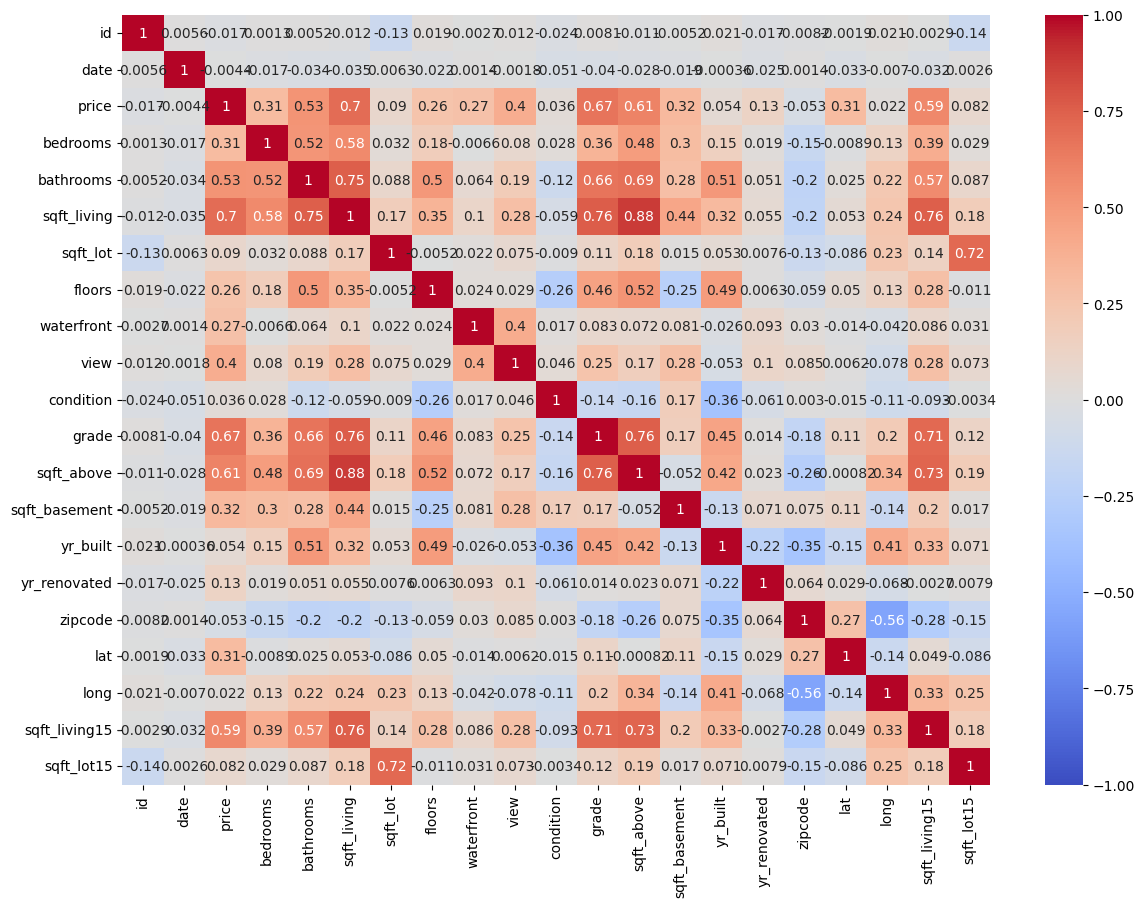

In [12]:
# Plot correlation matrix
df_corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm');

High correlation was observed among the columns 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', and 'sqft_living15'. To address this multicollinearity, Principal Component Analysis (PCA) will be performed later on on these columns. PCA helps to reduce redundancy and improve the stability of the regression model by transforming correlated features into a set of uncorrelated components.

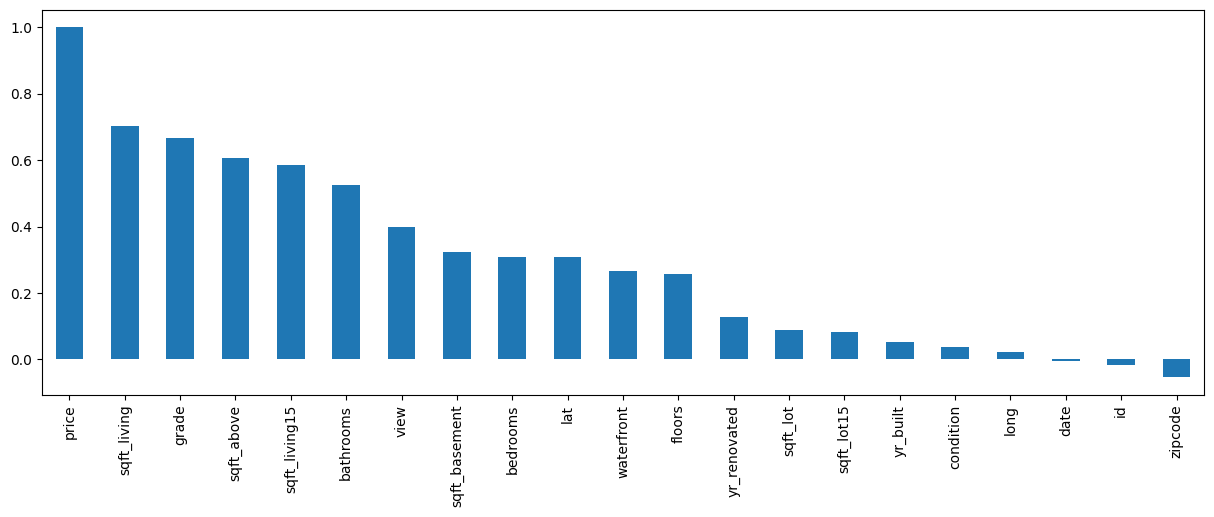

In [13]:
df_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

The 5 columns sqft_living, grade, sqft_above and sqft_living 15 are most highly correlated with the target variable. In contrast, the columns long, date, id and zipcode show hardly any correlation.

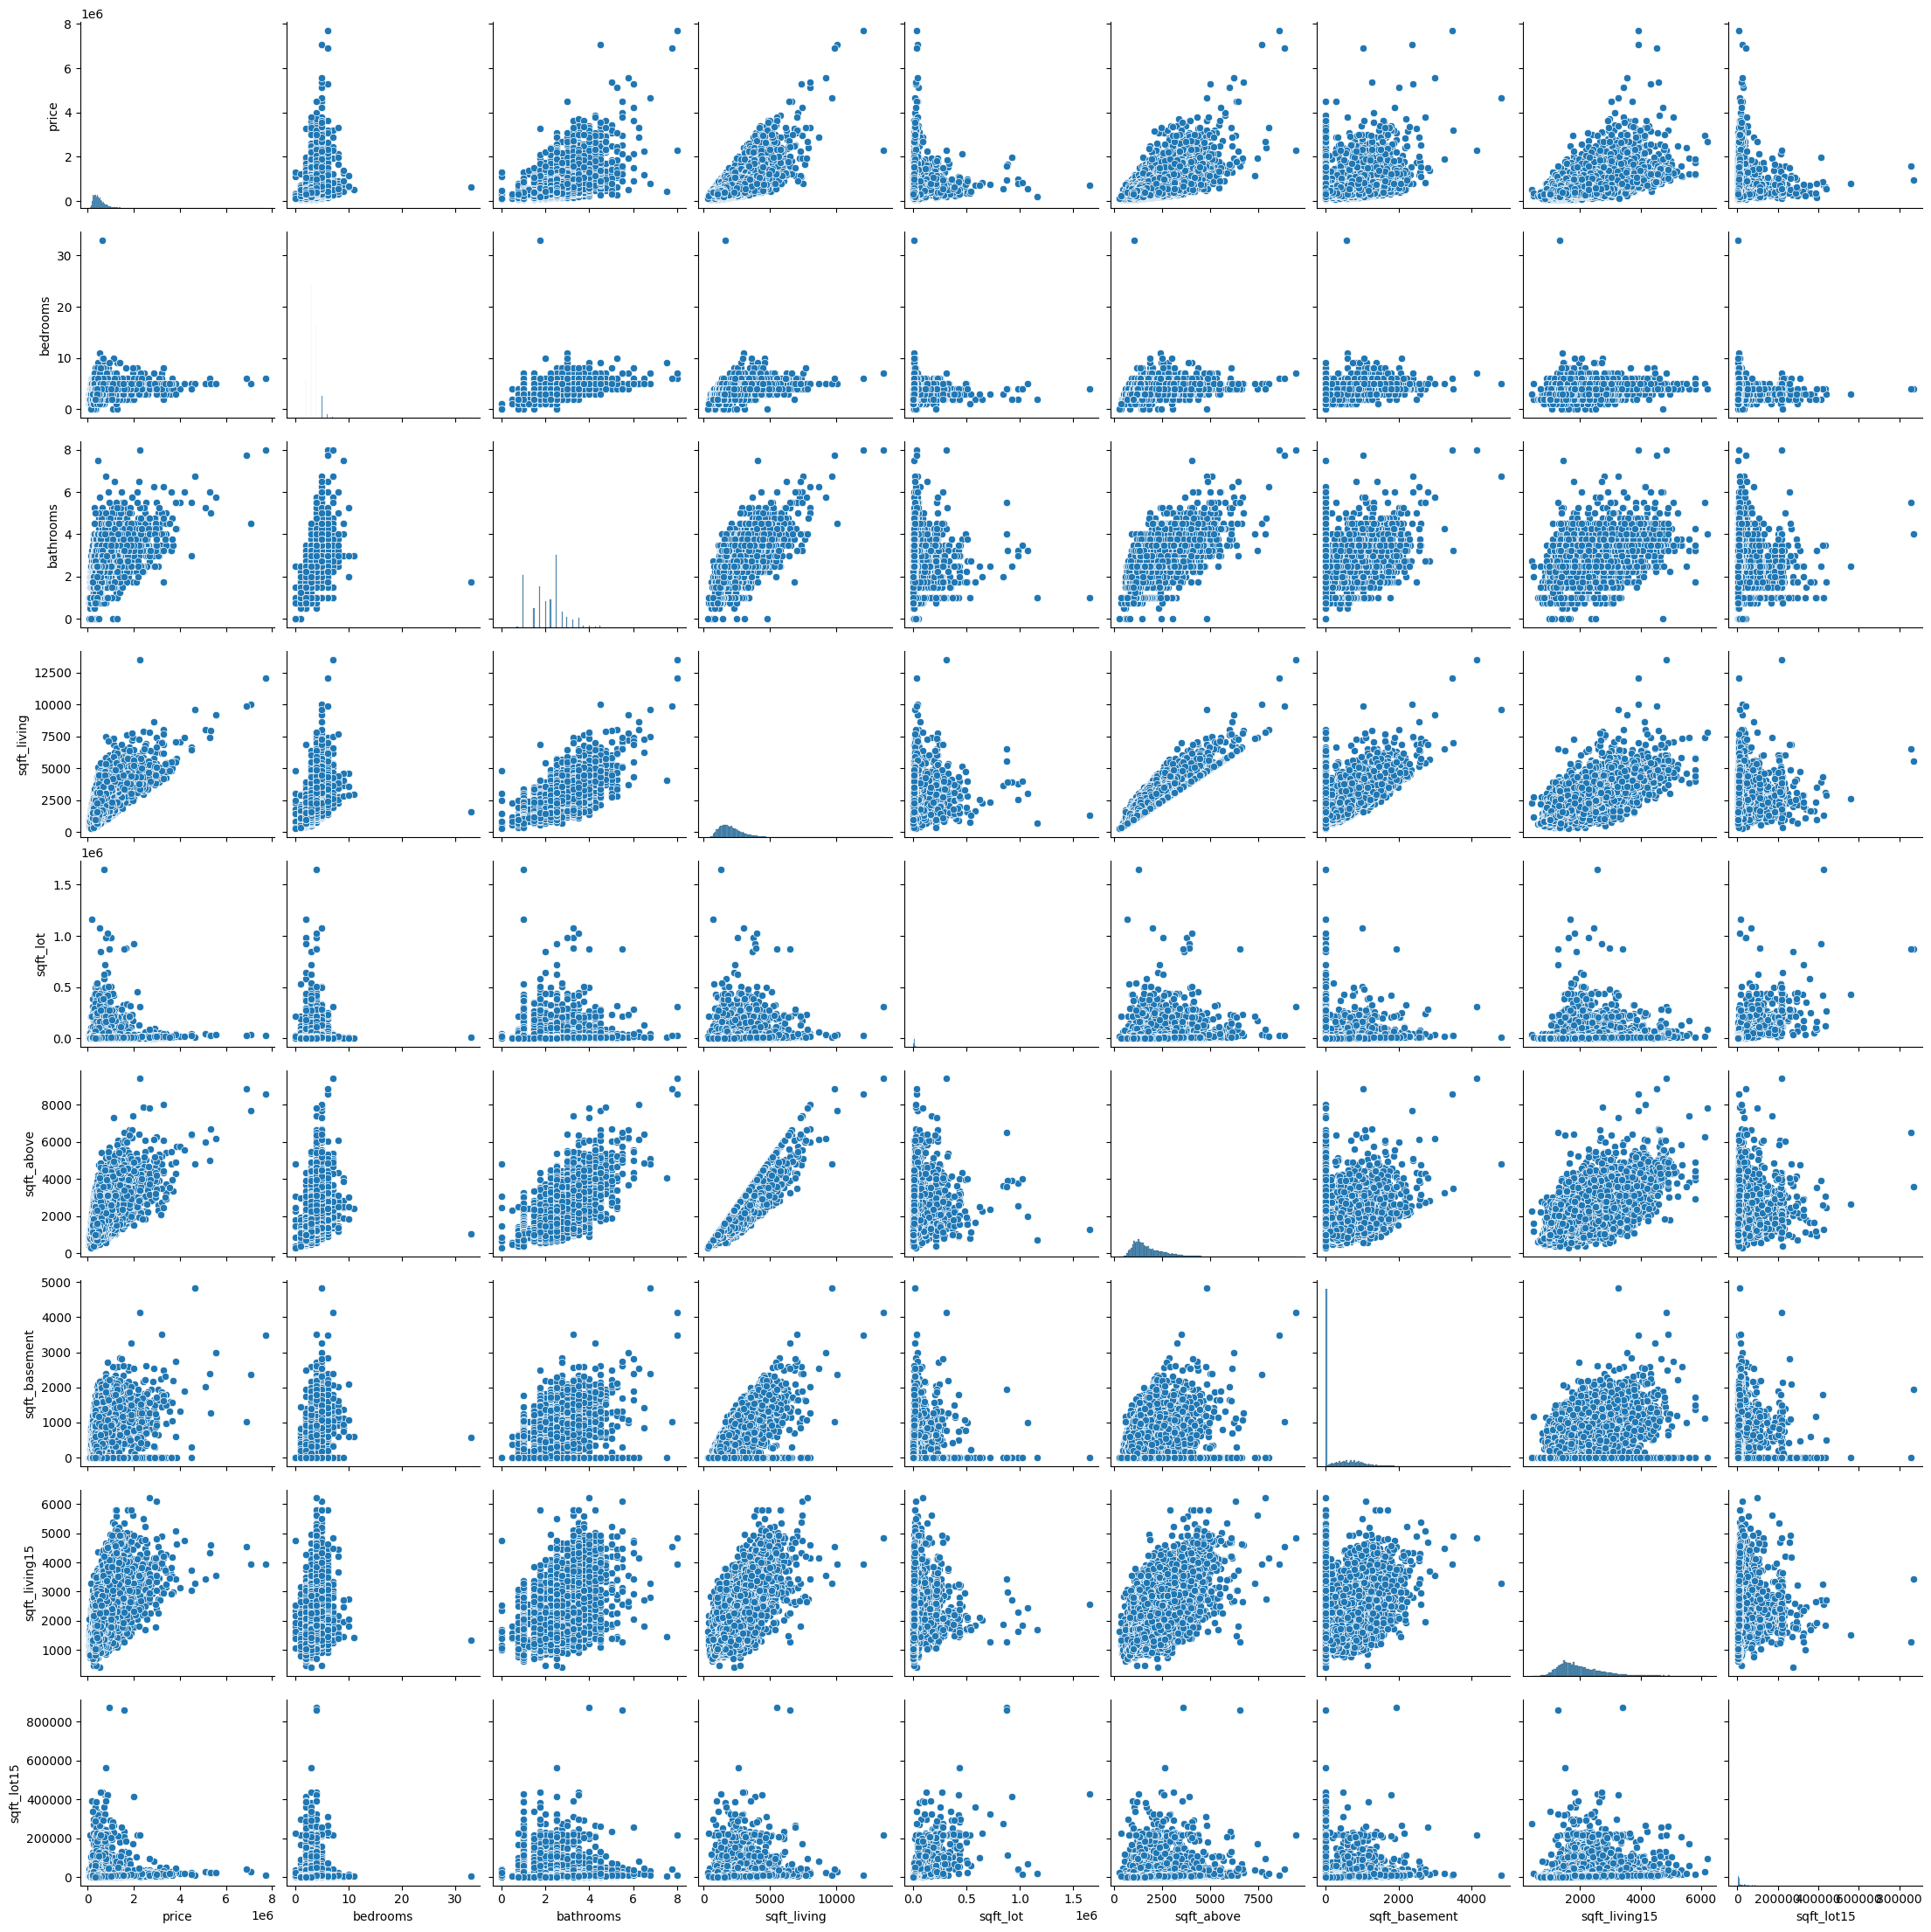

In [14]:
# Use pairplot to get a comprehensive overview of the relationships in the data
sns.pairplot(df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]);

In [15]:
# Explore categorical data
cat_cols = ['waterfront', 'view', 'condition', 'grade']

for col in cat_cols:
    print(f'{col} unique: {df[col].unique()}')
    print(f'{col} nunique: {df[col].nunique()}\n')

waterfront unique: [0 1]
waterfront nunique: 2

view unique: [0 3 4 2 1]
view nunique: 5

condition unique: [3 5 4 1 2]
condition nunique: 5

grade unique: [ 7  6  8 11  9  5 10 12  4  3 13  1]
grade nunique: 12



There are no unusual values in categorical features.

# Explore the dependent variable

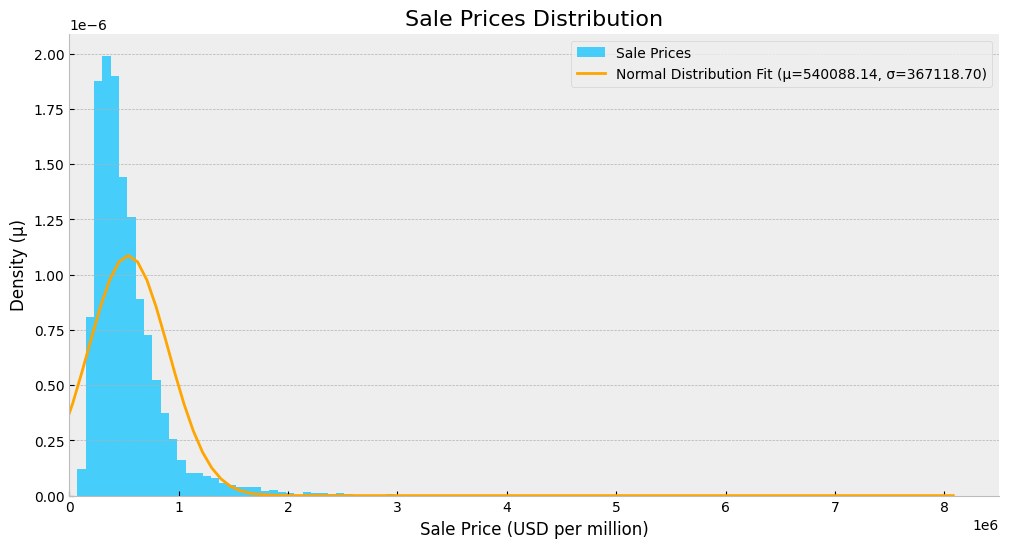

In [16]:
from scipy.stats import norm

# Dunkleres Farbschema
plt.style.use('bmh')

# Figure und Achsen erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Histogramm der Preise erstellen
count, bins, ignored = ax.hist(df['price'], bins=100, density=True, alpha=0.7, color='deepskyblue', label='Sale Prices')

# Kurve der Normalverteilung basierend auf den Daten hinzufügen
mu, std = norm.fit(df['price'])
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

ax.plot(x, p, 'orange', linewidth=2, label=f'Normal Distribution Fit (μ={mu:.2f}, σ={std:.2f})')

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title("Sale Prices Distribution", fontsize=16)
ax.set_xlabel('Sale Price (USD per million)', fontsize=12)
ax.set_ylabel('Density (μ)', fontsize=12)

# Horizontale und vertikale Achsenlinien entfernen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Horizontale Gitternetzlinien entfernen
ax.xaxis.grid(False)

# x-Achse so einstellen, dass sie bei 0 beginnt
ax.set_xlim(left=0)

# Legende hinzufügen
ax.legend()

# Graph anzeigen
plt.show()

Many statistical models and machine learning algorithms, such as linear regression or gradient-based methods, assume or perform better when the target variable is normally distributed. A right-skewed distribution can lead to inaccurate or suboptimal results. By normalizing or transforming the target variable, the model can achieve better performance and more accurate predictions.

Typical transformations used for right-skewed data include log transformations. These help bring the distribution of the target variable closer to a normal distribution. Log transformation is particularly effective for right-skewed data and reduces the influence of large values.

The dependent variable should therefore be normalized in the further course.

The following graphs show the distribution of the target variable before and after the Log transformation.

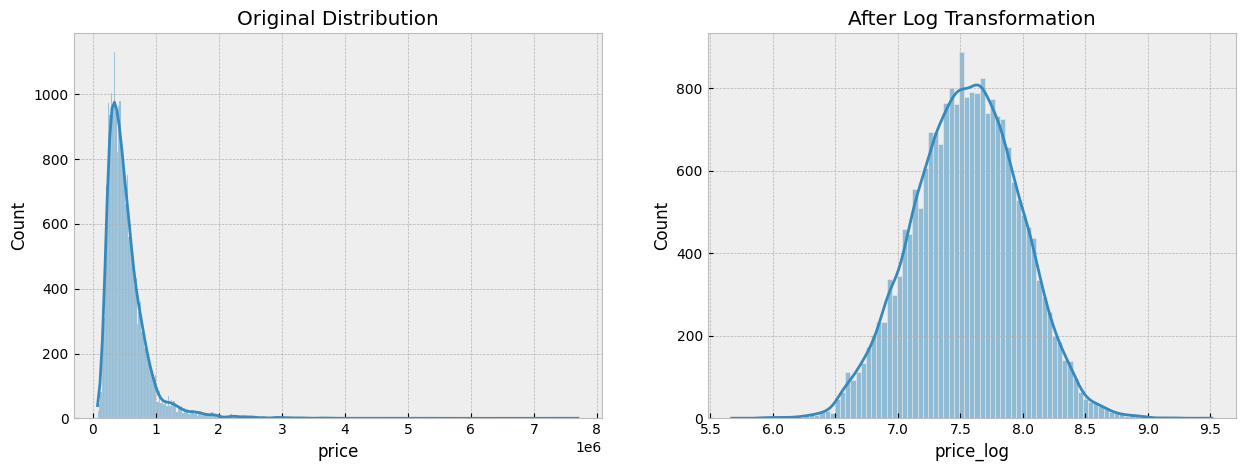

In [17]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

# Visualize the original distribution
sns.histplot(df['price'], kde=True, ax=ax[0])
ax[0].set_title('Original Distribution')
#plt.show()

# Apply log transformation
df['price_log'] = np.log(df['sqft_living'])

# Visualize the distribution after log transformation
sns.histplot(df['price_log'], kde=True, ax=ax[1])
ax[1].set_title('After Log Transformation')
plt.show()

# Data Cleaning

In [18]:
df = pd.read_csv("../input/housesalesprediction/kc_house_data.csv", parse_dates=['date'])

In [19]:
# (datatype conversion not necessary, missing values, drop unused columns)

# Data correction
# extreme value will be corrected and imputed based on the average number of bedrooms in the pipeline
df.loc[df['bedrooms'] > 30, 'bedrooms'] = np.nan
# zero entries will be replaced as np.nan and will be imputed based on the average in the pipeline
df.loc[df['bedrooms'] == 0, 'bedrooms'] = np.nan
df.loc[df['bathrooms'] == 0, 'bathrooms'] = np.nan

# drop unused columns
df_cleaned = df.drop(['id','date'], axis=1)

# Creating a Data Pipeline and Modeling

Explore different models to see how they work. Some models are more robust to non-normally distributed data as we have in this case. These models are less susceptible to distortions from extreme values. Decision trees, Random Forests, and Gradient Boosting are less sensitive to distributional shapes.

The first step is to create transformers for numeric and categorical columns in order to impute missing values, use OneHotEncoder for categorical columns if needed and standardize the data. In this step we will not yet need the OneHotEncoder, as the categorical data is ordinal and does not require any further processing. However, this will be required in a later step.

In [20]:
# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

# Update categorical and numerical columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('price')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df_cleaned.drop('price', axis=1)
y = np.log(df_cleaned['price']) #normalize dependent variable
X_preprocessed = pipeline.fit_transform(X)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RidgeRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'LassoRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, 
                                     param_grid=param_grids[model_name], 
                                     cv=cv, 
                                     scoring='neg_mean_squared_error', 
                                     n_jobs=-1, 
                                     verbose=0)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.2519549355845863

Best parameters for RidgeRegression: {'alpha': 10.0}
Best RMSE for RidgeRegression: 0.251954547146045

Best parameters for LassoRegression: {'alpha': 0.001}
Best RMSE for LassoRegression: 0.2519957949894227

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE for RandomForest: 0.17930293592034247

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best RMSE for XGBoost: 0.16735641643383883



# Principal Component Analysis

In [22]:
#pca
pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)

# Create a pipeline with the preprocessor and PCA
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

# Apply the pipeline to the dataset
X_pca = pipeline_pca.fit_transform(X)

In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RidgeRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'LassoRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, 
                                         param_grid=param_grids[model_name], 
                                         cv=cv, 
                                         scoring='neg_mean_squared_error', 
                                         n_jobs=-1, 
                                         verbose=0)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.2553447368771711

Best parameters for RidgeRegression: {'alpha': 10.0}
Best RMSE for RidgeRegression: 0.2553442422024132

Best parameters for LassoRegression: {'alpha': 0.001}
Best RMSE for LassoRegression: 0.2553796166277868

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.20457253059386482

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best RMSE for XGBoost: 0.20102709636467617



Execute PCA only on columns sqft_living, sqft_lot, grade, sqft_above, sqft_living15

In [24]:
pca = PCA()
X_pca_pre_2 = pca.fit_transform(X_preprocessed[[2 ,3, 8, 9, 16]])

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [25]:
# Define the columns to be subjected to PCA
pca_columns = ['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15']

# Pipeline for PCA columns: standardization followed by PCA
pca_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])

# Updated preprocessor with integrated PCA pipeline
pca_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_columns if col not in pca_columns]),
        ('cat', categorical_transformer, categorical_columns),
        ('pca', pca_pipeline, pca_columns)
    ], remainder='passthrough'
)

# Combine the updated preprocessor with the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor)
])

# Fit the pipeline and transform the data
X_pre_pca = pipeline.fit_transform(X)

Check transformed data

In [26]:
# Number of components from the PCA
n_pca_components = pipeline.named_steps['preprocessor'].named_transformers_['pca'].named_steps['pca'].n_components_

# Create column names for the PCA components
pca_column_names = [f'pca_{i+1}' for i in range(n_pca_components)]

# Get the column names for the non-transformed columns
non_pca_columns = [col for col in X.columns if col not in pca_columns]

# The remaining column names that were not transformed (including One-Hot encoded columns, etc.)
transformed_columns = non_pca_columns + categorical_columns.tolist()

# Combine all column names
all_column_names = transformed_columns + pca_column_names

# Create a DataFrame with the transformed data and new column names
X_transformed_df = pd.DataFrame(X_pre_pca, columns=all_column_names)

# Output the DataFrame
display(X_transformed_df.head())

,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,pca_1,pca_2,pca_3,pca_4
0,-0.410873,-1.451270,-0.915427,-0.087173,-0.305759,-0.629187,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.260715,-1.626577,-0.026760,0.161812,-0.238166
1,-0.410873,0.174641,0.936506,-0.087173,-0.305759,-0.629187,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.187868,0.005023,-0.130120,0.651164,0.761754
2,-1.516861,-1.451270,-0.915427,-0.087173,-0.305759,-0.629187,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,-0.172375,-1.538625,0.070442,-1.999831,0.486630
3,0.695115,1.150187,-0.915427,-0.087173,-0.305759,2.444294,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.284522,-1.259556,-0.078489,0.321655,-0.000892
4,-0.410873,-0.150541,-0.915427,-0.087173,-0.305759,-0.629187,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.192849,-0.300989,-0.158975,0.091376,-0.474910


In [27]:
pd.DataFrame(X_preprocessed, columns=X.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.410873,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.410873,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.516861,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.695115,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.410873,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.410873,0.499823,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,0.695115,0.499823,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.516861,-1.776452,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.410873,0.499823,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


In [28]:
# Split the data into training and testing sets
X_train_pre_pca, X_test_pre_pca, y_train_pre_pca, y_test_pre_pca = train_test_split(X_pre_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RidgeRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'LassoRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pre_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pre_pca[model_name] = GridSearchCV(estimator=model, 
                                             param_grid=param_grids[model_name], 
                                             cv=cv, 
                                             scoring='neg_mean_squared_error', 
                                             n_jobs=-1, 
                                             verbose=0)
    
    grids_pre_pca[model_name].fit(X_train_pre_pca, y_train_pre_pca)
    best_params = grids_pre_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pre_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.25195493558458637

Best parameters for RidgeRegression: {'alpha': 10.0}
Best RMSE for RidgeRegression: 0.25195454051410465

Best parameters for LassoRegression: {'alpha': 0.001}
Best RMSE for LassoRegression: 0.25200092449297895

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE for RandomForest: 0.17725244774550442

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best RMSE for XGBoost: 0.16758882501128552



# Feature Engineering

In [29]:
# feature engineering function
def engineer_features(df):
    """
    Creates new features:
    house_age: years since the house was built 
    has_renovated: whether the house has been renovated
    zipcode_4: Extracts the first four numbers of the zipcode
    The columns id, date, yr_built and yr_renovated are removed.
    
    Args:
    DataFrame
    
    Returns:
    pd.DataFrame with new features
    """
    df_out = df.copy()
    df_out['house_age'] = (df_out['date'] - pd.to_datetime(df_out['yr_built'], format='%Y')).dt.days / 365.25
    df_out['has_renovated'] = df_out['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)
    df_out['zipcode_4'] = df_out['zipcode'].astype(str).str[:4].astype(object)
    df_out = df_out.drop(columns=['id', 'date', 'yr_built', 'yr_renovated'])
    
    return df_out

feature_engineering_transformer = FunctionTransformer(engineer_features)

In [30]:
# Identify and update categorical and numerical columns
new_cols_categorical = pd.Index(['has_renovated', 'zipcode_4'])
new_cols_numeric = pd.Index(['house_age'])

# Define the columns to be subjected to PCA
pca_columns = ['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15']

# Pipeline for PCA columns: standardization followed by PCA
pca_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable and columns which are dropped in feature_engineering_function from numerical columns
numerical_columns = [col for col in numerical_columns if col not in ['id', 'date', 'price', 'yr_built', 'yr_renovated']]

# Updated preprocessor with integrated Feature Engineering Transformer
pca_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_columns if col not in pca_columns]),
        ('cat', categorical_transformer, categorical_columns),
        ('pca', pca_pipeline, pca_columns)
    ], remainder='passthrough'
)

# Combine the updated preprocessor with the pipeline
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', pca_preprocessor)
])

# Apply the pipeline to your dataset
X = df.drop('price', axis=1)
y = np.log(df['price'])
X_pre_fe = pipeline_fe.fit_transform(X)

In [31]:
# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_pre_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RidgeRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'LassoRegression': {
        'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, 
                                        param_grid=param_grids[model_name], 
                                        cv=cv, 
                                        scoring='neg_mean_squared_error', 
                                        n_jobs=-1, 
                                        verbose=0)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.23321139128629967

Best parameters for RidgeRegression: {'alpha': 0.01}
Best RMSE for RidgeRegression: 0.2332112338874393

Best parameters for LassoRegression: {'alpha': 0.001}
Best RMSE for LassoRegression: 0.23457171789426476

Best parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE for RandomForest: 0.1770601861736537

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best RMSE for XGBoost: 0.16782360895325069



# Testing Set Results

Transformers for numerical and categorical columns defined

In [32]:
for i in grids.keys():
    test_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(grids[i].predict(X_test))))
    test_r2 = r2_score(y_test, grids[i].predict(X_test))
    print(f'Testing Set Results {i}:')
    print(f"Root Mean Squared Error: ${test_rmse:,.2f}")
    print(f'R-squared Score: {test_r2:.4f}\n')

Testing Set Results LinearRegression:
Root Mean Squared Error: $276,709.83
R-squared Score: 0.7710

Testing Set Results RidgeRegression:
Root Mean Squared Error: $276,724.23
R-squared Score: 0.7710

Testing Set Results LassoRegression:
Root Mean Squared Error: $273,698.29
R-squared Score: 0.7707

Testing Set Results RandomForest:
Root Mean Squared Error: $137,445.93
R-squared Score: 0.8906

Testing Set Results XGBoost:
Root Mean Squared Error: $122,712.93
R-squared Score: 0.9051



Pipeline with the preprocessor and PCA

In [33]:
for i in grids.keys():
    test_pca_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(grids_pca[i].predict(X_test_pca))))
    test_pca_r2 = r2_score(y_test, grids_pca[i].predict(X_test_pca))
    print(f'Testing Set Results {i}:')
    print(f"Root Mean Squared Error: ${test_pca_rmse:,.2f}")
    print(f'R-squared Score: {test_pca_r2:.4f}\n')

Testing Set Results LinearRegression:
Root Mean Squared Error: $323,106.75
R-squared Score: 0.7653

Testing Set Results RidgeRegression:
Root Mean Squared Error: $322,964.57
R-squared Score: 0.7653

Testing Set Results LassoRegression:
Root Mean Squared Error: $319,143.25
R-squared Score: 0.7650

Testing Set Results RandomForest:
Root Mean Squared Error: $166,061.90
R-squared Score: 0.8561

Testing Set Results XGBoost:
Root Mean Squared Error: $165,206.95
R-squared Score: 0.8613



Pipeline with preprocessor and PCA. PCA executed only on columns sqft_living, sqft_lot, grade, sqft_above, sqft_living15

In [34]:
for i in grids.keys():
    test_pre_pca_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(grids_pre_pca[i].predict(X_test_pre_pca))))
    test_pre_pca_r2 = r2_score(y_test, grids_pre_pca[i].predict(X_test_pre_pca))
    print(f'Testing Set Results {i}:')
    print(f"Root Mean Squared Error: ${test_pre_pca_rmse:,.2f}")
    print(f'R-squared Score: {test_pre_pca_r2:.4f}\n')

Testing Set Results LinearRegression:
Root Mean Squared Error: $276,709.83
R-squared Score: 0.7710

Testing Set Results RidgeRegression:
Root Mean Squared Error: $276,721.37
R-squared Score: 0.7710

Testing Set Results LassoRegression:
Root Mean Squared Error: $274,184.11
R-squared Score: 0.7709

Testing Set Results RandomForest:
Root Mean Squared Error: $130,113.26
R-squared Score: 0.8941

Testing Set Results XGBoost:
Root Mean Squared Error: $119,281.80
R-squared Score: 0.9060



Pipeline with preprocessor, PCA and integrated Feature Engineering Transformer

In [35]:
for i in grids.keys():
    test_fe_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(grids_fe[i].predict(X_test_fe))))
    test_fe_r2 = r2_score(y_test, grids_fe[i].predict(X_test_fe))
    print(f'Testing Set Results {i}:')
    print(f"Root Mean Squared Error: ${test_fe_rmse:,.2f}")
    print(f'R-squared Score: {test_fe_r2:.4f}\n')

Testing Set Results LinearRegression:
Root Mean Squared Error: $277,893.98
R-squared Score: 0.8051

Testing Set Results RidgeRegression:
Root Mean Squared Error: $277,853.09
R-squared Score: 0.8052

Testing Set Results LassoRegression:
Root Mean Squared Error: $273,436.30
R-squared Score: 0.8033

Testing Set Results RandomForest:
Root Mean Squared Error: $129,980.04
R-squared Score: 0.8938

Testing Set Results XGBoost:
Root Mean Squared Error: $120,735.37
R-squared Score: 0.9064



# Model selection

Chose model with best R-squared Score

In [36]:
# save best model
import pickle
best_model = grids_fe['XGBoost']
pickle.dump(best_model, open('best_model.p', 'wb'))

In [37]:
def predict_house_price(csv_file, model):
    """
    Estimate house prices for house sales in King County
    Args:
        csv_file (str): Path of the incoming data csv file holding the following columns:
        'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'
        model (sklearn estimator): Trained XGBoost model.
    
    Returns:
        numpyArray: Estimated house price(s) [USD]
    """
    # read the data
    df = pd.read_csv(csv_file, parse_dates=['date'])
    
    # clean the data
    df.loc[df['bedrooms'] > 30, 'bedrooms'] = np.nan
    df.loc[df['bedrooms'] == 0, 'bedrooms'] = np.nan
    df.loc[df['bathrooms'] == 0, 'bathrooms'] = np.nan
    
    # Apply the feature engineering and preprocessing
    X_pre_fe = pipeline_fe.transform(df)
    
    # Predict using the model
    predictions = model.predict(X_pre_fe)
    
    # Return the predictions in the original scale (reverse the log transformation)
    return np.exp(predictions)

Test the final function

In [38]:
# Save DataFrame X to a CSV file
X.to_csv('test_csv.csv', index=False)

# Load the model from the pickle file
model = pickle.load(open('best_model.p', 'rb'))

# Pass the CSV file and model to the function
predicted_prices = predict_house_price('test_csv.csv', model)

# check the output
print(predicted_prices)

[241708.3  518737.84 226161.62 ... 363781.22 447517.44 337745.9 ]
